<a href="https://colab.research.google.com/github/peuape/deep_learning/blob/main/vanishing_gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparison of the Effect of Vanishing Gradients on Neural Network – ReLU and Sigmoid#

###Here we compare the accuracy of neural networks using ReLU or Sigmoid as the activation function, and see the effect that the problem of vanishing gradients has on the sigmoid function. We use data generated in the manner described here: https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1174/lectures/vanishing_grad_example.html###

In [1]:
import torch
import torch.nn as nn
import pprint


pp = pprint.PrettyPrinter()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
'''
class TwoLayerNet

initialisation params:
    input_size: int
    hidden1_size: int
    hidden2_size: int
    output_size: int
    activation: str. "sigmoid" or "relu"
'''

class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size, activation):
        super(TwoLayerNet, self).__init__()

        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.output_size = output_size

        if activation == "sigmoid":
            self.activation = nn.Sigmoid()
        elif activation == "relu":
            self.activation = nn.ReLU()
        else:
            raise ValueError("Invalid activation function. Use 'sigmoid' or 'relu'.")

        self.model = nn.Sequential(
            nn.Linear(self.input_size, self.hidden1_size),
            self.activation,
            nn.Linear(self.hidden1_size, self.hidden2_size),
            self.activation,
            nn.Linear(self.hidden2_size, self.output_size)    ,
            nn.Softmax()
        )

    def forward(self, x):
        output = self.model(x)
        return output

(-1.0, 1.0)

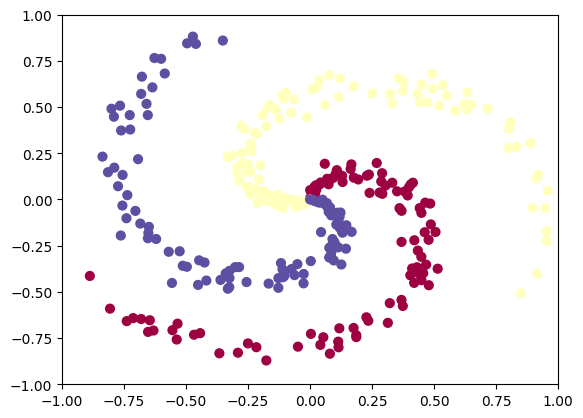

In [44]:

#generate random data -- not linearly separable
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
num_train_examples = X.shape[0]
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])

In [45]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.from_numpy(y).long()
y = nn.functional.one_hot(y, num_classes=3)
y = y.float()

In [29]:
X.shape, y.shape

(torch.Size([300, 2]), torch.Size([300, 3]))

In [40]:
sigmoid_model = TwoLayerNet(input_size=X.shape[1], hidden1_size=10, hidden2_size=10, output_size=y.shape[1], activation="sigmoid")
relu_model = TwoLayerNet(input_size=X.shape[1], hidden1_size=10, hidden2_size=10, output_size=y.shape[1], activation="relu")

In [35]:
import torch.optim as optim

##Sigmoid##

In [41]:
adam = optim.Adam(sigmoid_model.parameters(), lr=0.0001)
loss_function = nn.MSELoss()
y_pred = sigmoid_model(X)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [46]:
n_epochs = 10

for epoch in range(n_epochs):
    adam.zero_grad()
    y_pred = sigmoid_model(X)
    loss = loss_function(y_pred,y)
    print(f"Epoch {epoch}: traing loss: {loss}")
    loss.backward()
    adam.step()

Epoch 0: traing loss: 0.24050961434841156
Epoch 1: traing loss: 0.24043488502502441
Epoch 2: traing loss: 0.2403603047132492
Epoch 3: traing loss: 0.24028588831424713
Epoch 4: traing loss: 0.240211620926857
Epoch 5: traing loss: 0.24013753235340118
Epoch 6: traing loss: 0.24006356298923492
Epoch 7: traing loss: 0.23998978734016418
Epoch 8: traing loss: 0.23991617560386658
Epoch 9: traing loss: 0.2398427277803421


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


##Relu##

In [47]:
adam = optim.Adam(relu_model.parameters(), lr=0.0001)
loss_function = nn.MSELoss()
y_pred = sigmoid_model(X)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [48]:
n_epochs = 10

for epoch in range(n_epochs):
    adam.zero_grad()
    y_pred = relu_model(X)
    loss = loss_function(y_pred,y)
    print(f"Epoch {epoch}: traing loss: {loss}")
    loss.backward()
    adam.step()

Epoch 0: traing loss: 0.22600077092647552
Epoch 1: traing loss: 0.2259841114282608
Epoch 2: traing loss: 0.22596748173236847
Epoch 3: traing loss: 0.22595083713531494
Epoch 4: traing loss: 0.2259342074394226
Epoch 5: traing loss: 0.22591757774353027
Epoch 6: traing loss: 0.22590097784996033
Epoch 7: traing loss: 0.22588439285755157
Epoch 8: traing loss: 0.22586777806282043
Epoch 9: traing loss: 0.22585125267505646


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
